#Task 2: 
**Prediction using Unsupervised ML**
Unsupervised Machine learning algorithms afre used in cases where the target variable is not available.
using the available features we try to predict the outcome. 
In this task we have to predict otimum numbers of clusters in the 'Iris dataset'.


#importing libraries and the dataset

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
data=pd.read_csv('/Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#Dropping out the target variable 'Species'
Since in the dataset we are given, the target variable is already available and we are supposed to use the Unsupervised ML algorithm, we drop out the target variable.
Let's see the dataset after removing the target variable.

In [23]:
data=data.drop(columns=['Species'])
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [25]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#visualization

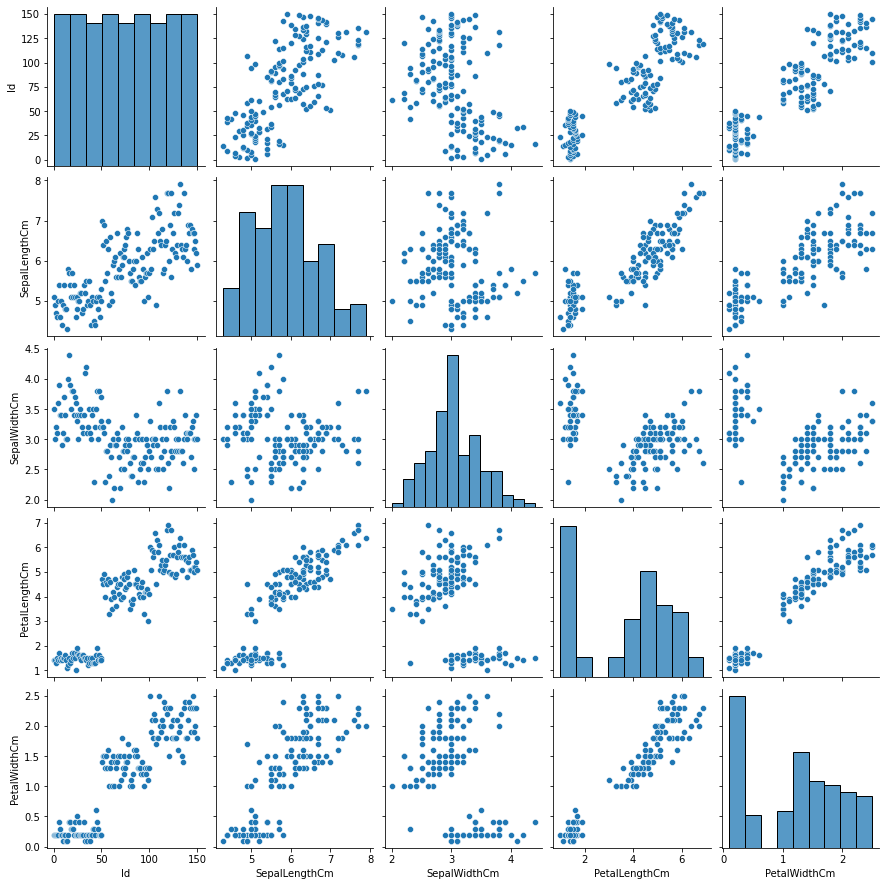

In [26]:
sns.pairplot(data=data)

#Finding optimum number of clusters in KMeans Clustering algorithm.
**ELBOW METHOD**

In [27]:
X= data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
   kmeans.fit(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_)  

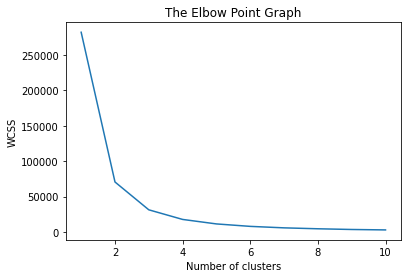

In [10]:
#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Visualising the clusters

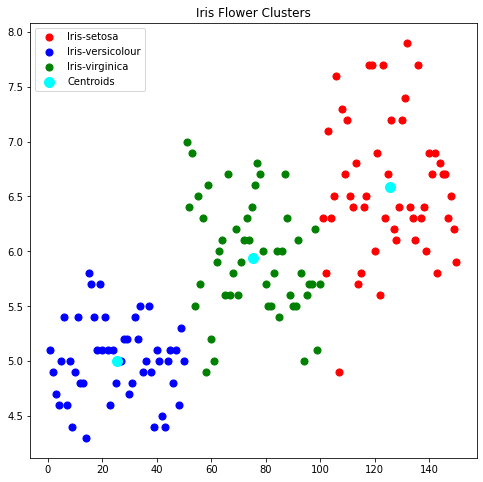

In [30]:

plt.figure(figsize=(8, 8))
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.legend()
plt.show()